### 简介
这一节主要是为模型打补丁，在这之前笔者已经介绍并实现了几种典型的机器学习模型，比如线性回归、logistic回归、最大熵、感知机、svm等，但目前它们都有一个共性，那就是构造的损失函数对每个样本都是“一视同仁”的，即每个样本在损失函数中权重都是一样的，为了方便，可以将它们的损失函数做如下抽象：  

$$
L(w,x,y)=\sum_{i=1}^Nl(w,x_i,y_i)
$$  

这里$L(\cdot)$表示整体的损失函数，$l(w,x_i,y_i)$表示第$i$个样本的损失函数，样本量为$N$，对具体情况有：  

线性回归有：  

$$
l(w,x_i,y_i)=(y_i-w^Tx_i)^2
$$  

对logistic回归：  

$$
l(w,x_i,y_i)=-y_ilog\phi(x_i,w)-(1-y_i)log(1-\phi(x_i,w)),这里 \phi(x,w)=\frac{1}{1+e^{-w^Tx}}
$$  

对感知机：  

$$
l(w,x_i,y_i)=max\{0,-y_iw^Tx_i\}
$$  

对最大熵模型：  

$$
l(w,x_i,y_i)=\frac{exp(\sum_{j=1}^nw_jf_j(x_i,y_i))}{\sum_yexp(\sum_{j=1}^nw_jf_j(x_i,y))},这里f_j,j=1,2,..,n表示特征函数
$$  

对svm：  

$$
l(w,x_i,y_i)=\frac{1}{2N}w^Tw+C\varepsilon_i,y_i(w^T\phi(x_i)+b)\geq 1-\varepsilon_i,\varepsilon_i\geq0
$$

### 代价敏感
如果对所有样本的损失函数都考虑一样的权重其实是有问题的，比如对于**离群点**、**异常点**这样的数据，其实可以忽略掉其损失函数；特别地，对于类别不平衡分类问题，我们可以给少数类样本更高的权重，而对于多数类更低的权重；另外对于像adaboost这样的集成学习方法，我们可以迭代调整每个样本点的权重以组合得到一个不错的强分类器；所以在损失函数中考虑样本权重，在某些场景下其实很有必要，简单来说考虑样本权重后，损失函数可以更新如下：  

$$
L(w,x,y)=\sum_{i=1}^N\alpha_il(w,x_i,y_i)
$$  

这里$\alpha_i$表示样本$i$的权重

### 代码实现
代码实现其实很easy，因为我们大部分情况下都是采用的随机梯度下降，所以每次更新只需对梯度$dw$乘以$\alpha_i$即可，具体地，我们为`fit`函数添加一个参数`sample_weight`以指定每个样本的权重（对各模型的更新代码就不帖了）,接下来我们对不平衡分类测试svm的效果

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir('../')
from ml_models import utils
from ml_models.svm import SVC
%matplotlib inline

In [2]:
X, y = make_classification(n_samples=500, n_features=2,
                           n_informative=2,n_redundant=0,
                           n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,weights=[0.05, 0.95],
                           class_sep=3,flip_y=0.05, random_state=0)

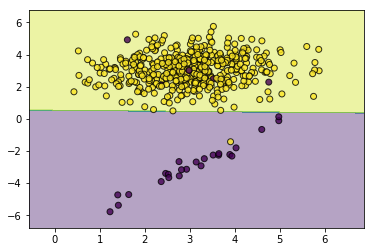

In [3]:
svc_without_sample_weight=SVC(kernel='rbf',gamma=2.0)
svc_without_sample_weight.fit(X,y)
utils.plot_decision_function(X=X,y=y,clf=svc_without_sample_weight)

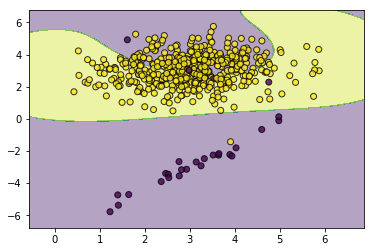

In [4]:
#然后我们加大少数类的权重
weights=np.where(y==0,20,1)
svc_with_sample_weight=SVC(kernel='rbf',gamma=2.0)
svc_with_sample_weight.fit(X,y,sample_weight=weights)
utils.plot_decision_function(X=X,y=y,clf=svc_with_sample_weight)